<center>
<h1 style="color:red; font-size:70px;"> Studio dataset</h1>

In [7]:
import imagehash
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from tensorflow.keras.preprocessing import image
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomZoom, RandomContrast

In [8]:
print("Inizia la carica del dataset")
trDat = tf.keras.utils.image_dataset_from_directory(
    "train",
    shuffle = True,
    seed = 123,
    image_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    label_mode = "categorical"
)
    
teDat = tf.keras.utils.image_dataset_from_directory(
    "test",
    shuffle = True,
    seed = 123,
    image_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    label_mode = "categorical"
)
print("Dataset correttamente caricato!")

Inizia la carica del dataset


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Dataset correttamente caricato!


## Esempi di immagini

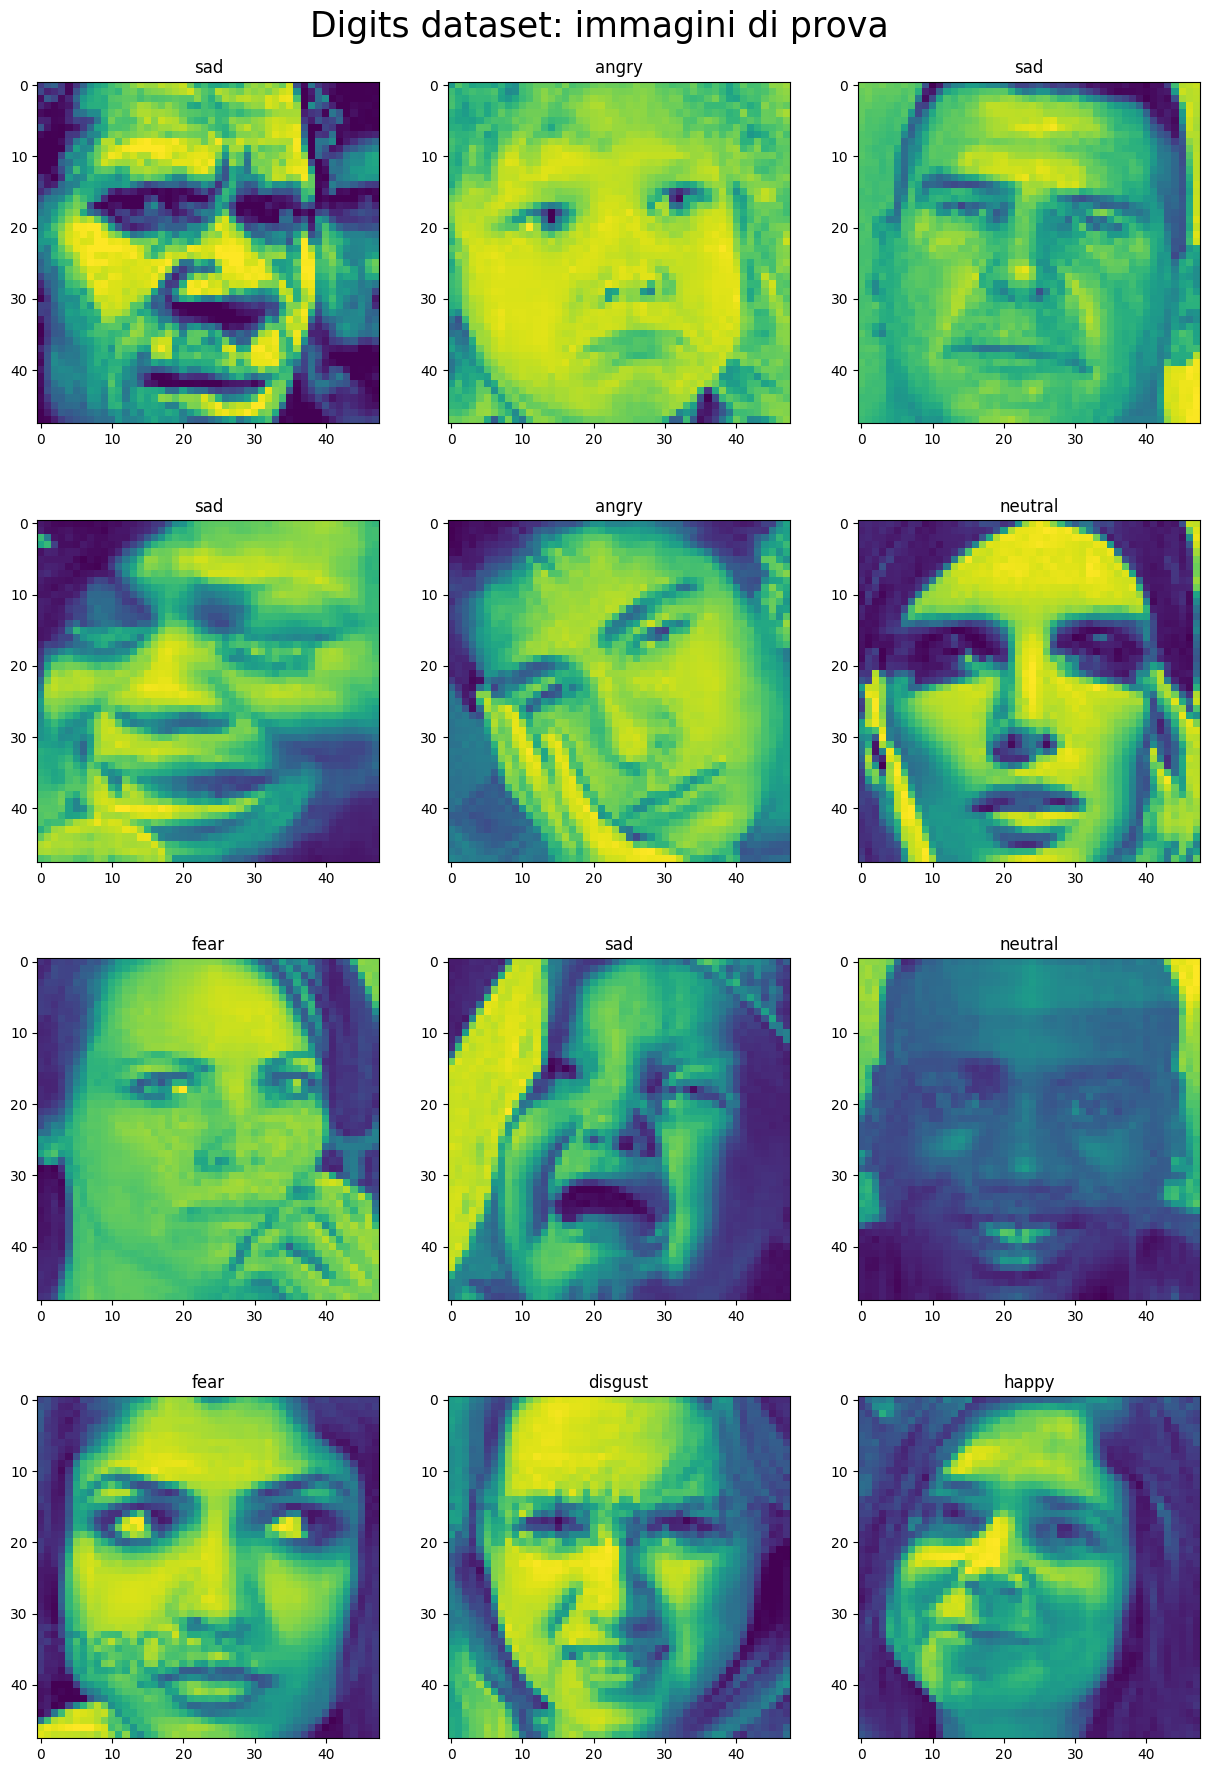

2025-09-07 12:53:27.734437: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Funzione per visualizzare alcuni elementi appartenenti al dataset
def studyDat(img, lab, classes):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j]/255.)
            ax[i][j].set_title(classes[np.argmax(lab[5*i+j])])

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for img, lab in trDat.take(1):
    studyDat(img, lab, cls)

## Class imbalance

In [7]:
# Valuto le classi presenti
labTr = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in trDat])
classes = np.unique(labTr)

# Calcolo dei pesi e creazione dizionario necessario per keras
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=labTr)
class_weights = dict(zip(classes, class_weights))
print(class_weights)

2025-09-07 12:59:19.620003: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


{np.int64(0): np.float64(1.0266046844269623), np.int64(1): np.float64(9.406618610747051), np.int64(2): np.float64(1.0010460615781582), np.int64(3): np.float64(0.5684387684387684), np.int64(4): np.float64(0.8260394187886635), np.int64(5): np.float64(0.8491274770777877), np.int64(6): np.float64(1.293372978330405)}


In [12]:
# Valuto le classi presenti
labTr = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in trDat])
labTe = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in teDat])

2025-09-08 11:17:36.186048: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
numTr = []
numTe = []
for i in range(0, 7):
    numTr.append(np.sum(labTr == i))
    numTe.append(np.sum(labTe == i))

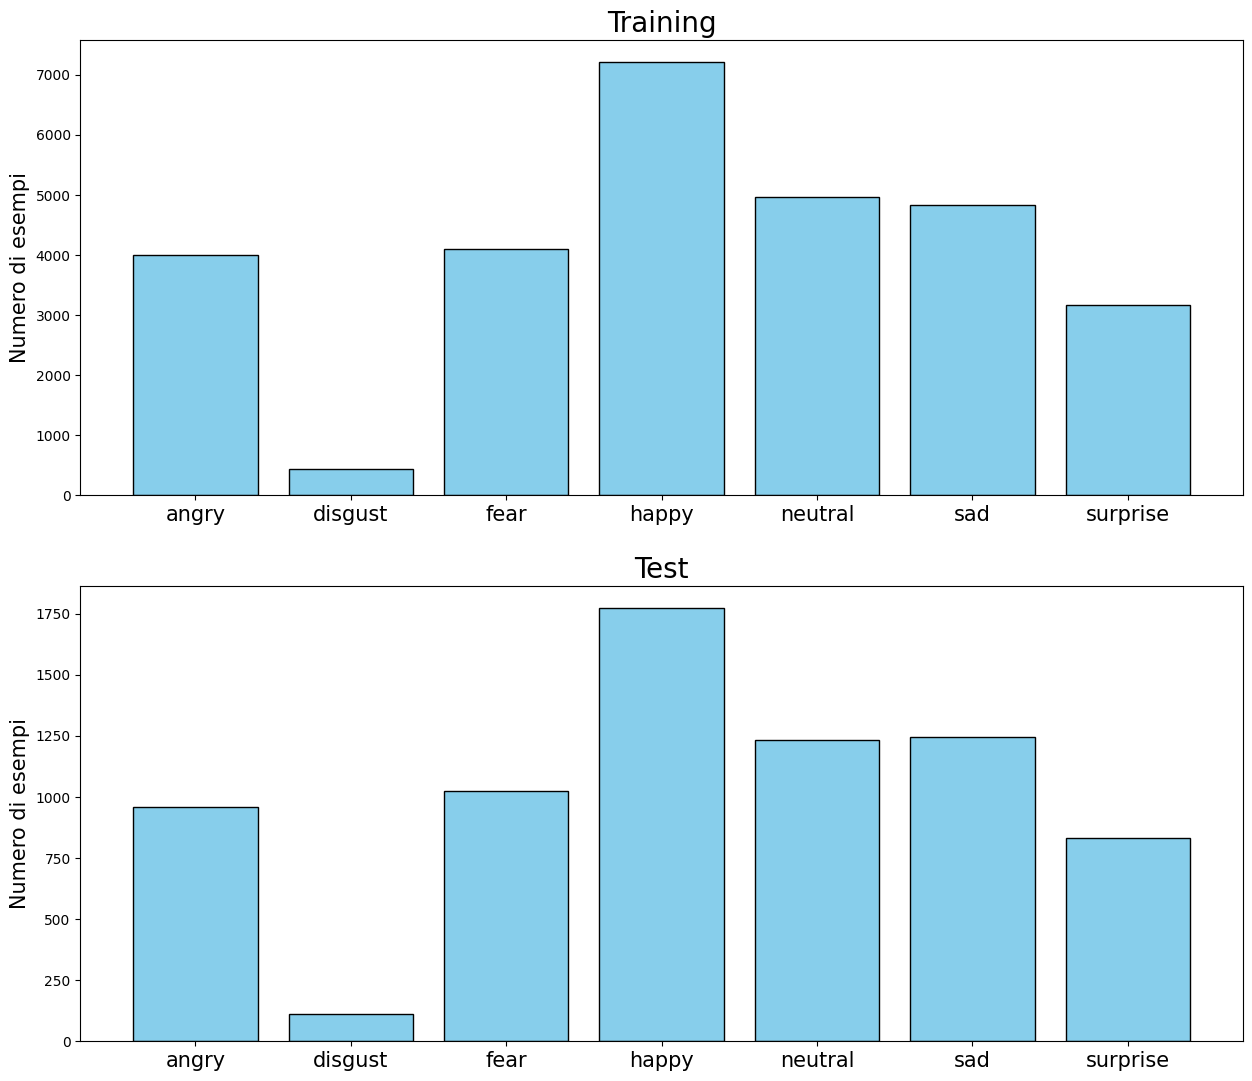

In [20]:
# Creo figura e poi riempio ciclando
fig, ax = plt.subplots(2, 1, figsize=(15, 13))  
cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

ax[0].bar(range(len(numTr)), numTr, color='skyblue', edgecolor='black')
ax[0].set_xticks(range(len(numTr)), [i for i in cls], fontsize = 15)
ax[0].set_ylabel("Numero di esempi", fontsize = 15)
ax[0].set_title("Training", fontsize = 20)

ax[1].bar(range(len(numTe)), numTe, color='skyblue', edgecolor='black')
ax[1].set_xticks(range(len(numTe)), [i for i in cls], fontsize = 15)
ax[1].set_ylabel("Numero di esempi", fontsize = 15)
ax[1].set_title("Test", fontsize = 20)

#plt.tight_layout()
plt.show()

## Singolo esempio

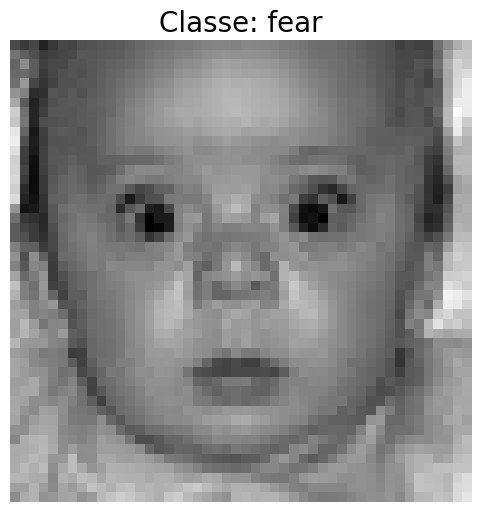

In [42]:
images, labels = next(iter(trDat))
cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

img = images[0].numpy().astype("uint8")
label = cls[np.argmax(labels[0].numpy())]

plt.figure(figsize=(6,6))
plt.imshow(img.squeeze(), cmap="gray") 
plt.title(f"Classe: {label}", fontsize = 20)
plt.axis("off")
plt.show()


## Esempio per classe

In [43]:
print("Inizia la carica del dataset")
trDat = tf.keras.utils.image_dataset_from_directory(
    "train",
    shuffle = True,
    seed = 123,
    image_size = (48, 48),
    batch_size = 256,
    color_mode = "grayscale",
    label_mode = "categorical"
)

Inizia la carica del dataset
Found 28709 files belonging to 7 classes.


In [48]:
images, labels = next(iter(trDat))
cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

impl = []
for i in range(0, 7):
    for k, l in enumerate(labels):
        if i == np.argmax(l):
            impl.append(images[k])
            break

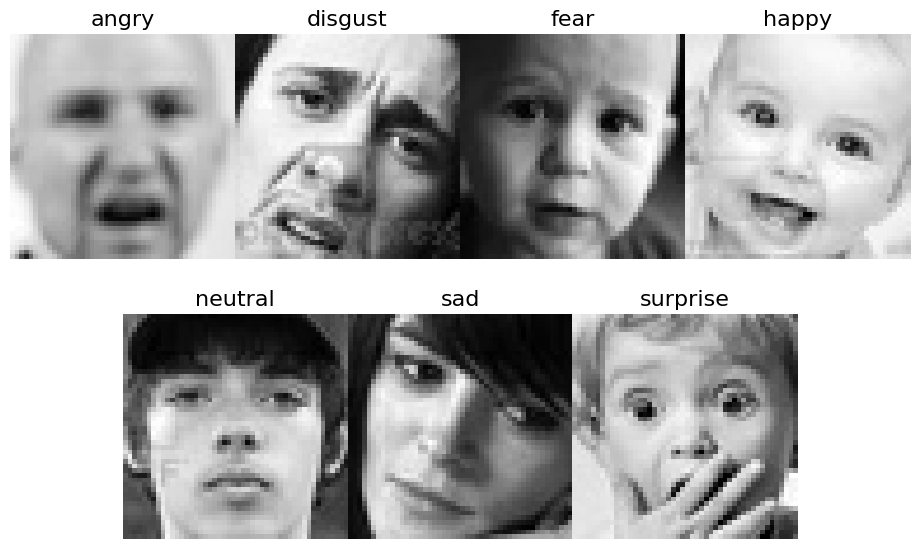

In [ ]:
fig = plt.figure(figsize=(15, 8)) 

n_rows = 2
images_per_row = [4, 3]
y_positions = [0.55, 0.2] 
img_width = 0.15
img_height = 0.4 

img_idx = 0
for row in range(n_rows):
    n_imgs = images_per_row[row]
    total_width = n_imgs * img_width
    x_start = 0.5 - total_width / 2
    
    for i in range(n_imgs):
        ax = fig.add_axes([x_start + i*img_width, y_positions[row], img_width, img_height])
        ax.imshow(impl[img_idx].numpy().squeeze(), cmap='gray')
        ax.set_title(cls[img_idx], fontsize=16)
        ax.axis('off')
        img_idx += 1

plt.show()


## Esempi di data augmentation

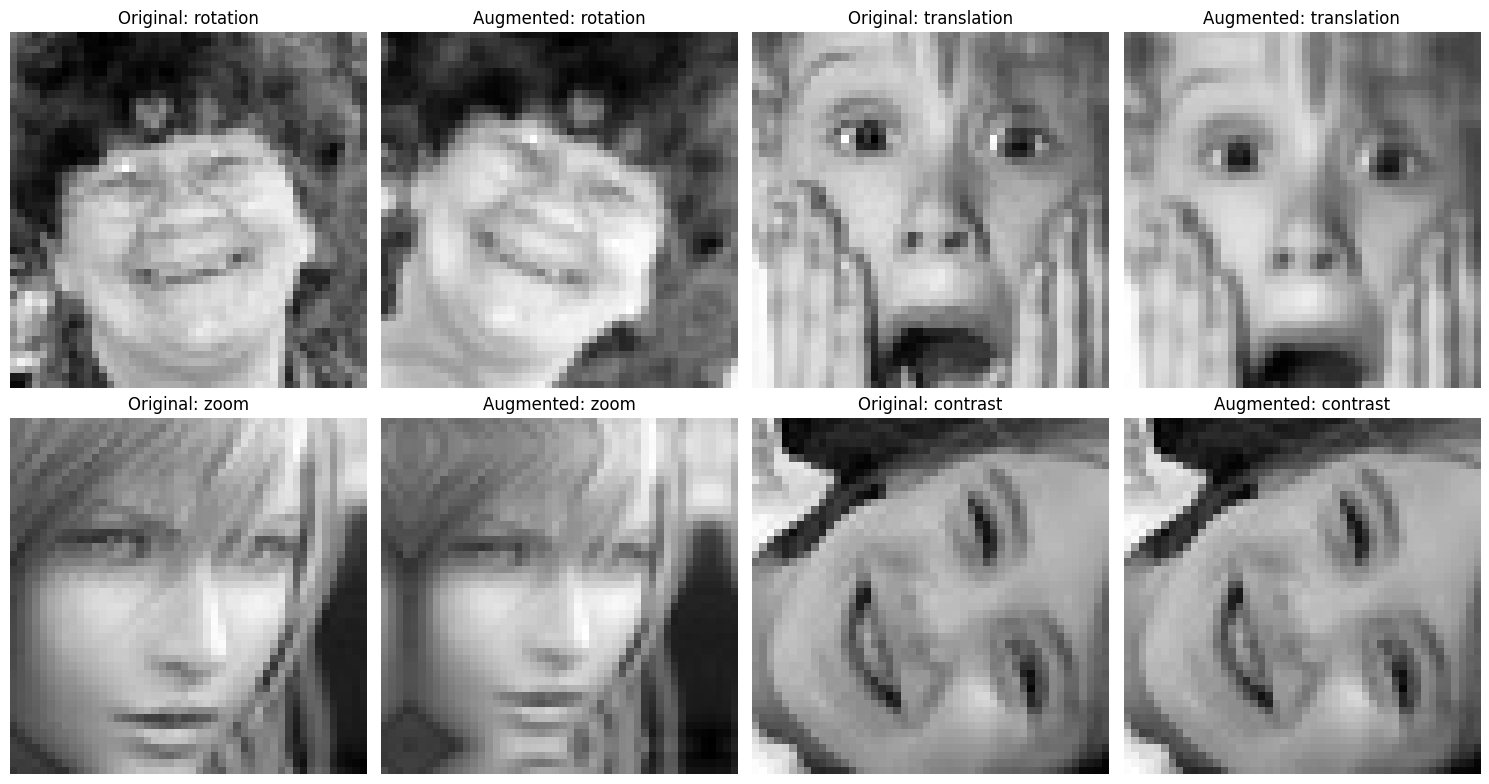

In [16]:
img, lab = next(iter(teDat))
fig, ax = plt.subplots(2, 4, figsize=(15,8))
    
augN = ["rotation", "translation", "zoom", "contrast"]
augm = [RandomRotation(0.1), RandomTranslation(0.1,0.1), RandomZoom(0.2), RandomContrast(0.1)]


for i, (aug, name) in enumerate(zip(augm, augN)):
    im = np.expand_dims(img[i], axis=0)

    # Applica augmentazione
    augIm = aug(im, training=True)
    augIm = tf.squeeze(augIm).numpy()

    j = i
    if i >= 2:
        j = i%2
    
    # Originale
    ax[i//2, 2*j].imshow(tf.squeeze(im).numpy(), cmap='gray')
    ax[i//2, 2*j].set_title(f"Original: {name}")
    ax[i//2, 2*j].axis('off')
    
    # Modificata
    ax[i//2, 2*j+1].imshow(augIm, cmap='gray')
    ax[i//2, 2*j+1].set_title(f"Augmented: {name}")
    ax[i//2, 2*j+1].axis('off')

plt.tight_layout()
plt.show()


## Immagini simili

2025-09-11 16:04:26.485872: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape immagini: (28709, 48, 48, 1)
Calcolo degli hashes
Filtro le immagini in base agli hash
Trovate 5 coppie di immagini simili


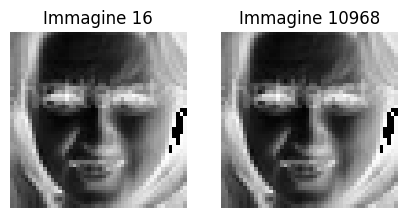

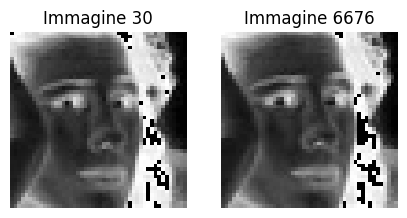

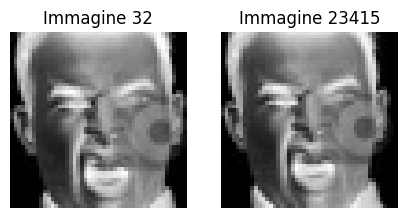

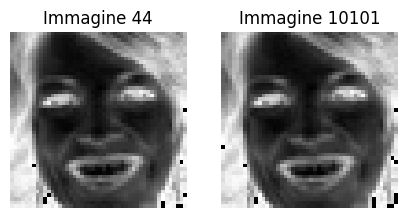

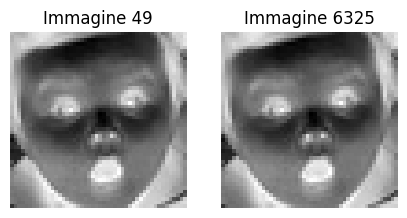

In [9]:
im = []
for batchIm, _ in trDat:
    im.append(batchIm.numpy())
img = np.concatenate(im, axis=0)
print("Shape immagini:", img.shape)  # (num_immagini, 48,48,1)

# Converti in PIL Images & calcolo hashes
print("Calcolo degli hashes")
pilIm = [Image.fromarray((im.squeeze() * 255).astype(np.uint8)) for im in img]
hashes = [imagehash.phash(img) for img in pilIm]

# Trova coppie di immagini simili
threshold = 5  
simPair = []

print("Filtro le immagini in base agli hash")
for i in range(len(hashes)):
    for j in range(i+1, len(hashes)):
        if abs(hashes[i] - hashes[j]) <= threshold:
            simPair.append((i, j))

        if len(simPair) == 5:
            break
    
    if len(simPair) == 5:
        break

print(f"Trovate {len(simPair)} coppie di immagini simili")

# Visualizza le prime N coppie simili
N = 5
for idx, (i, j) in enumerate(simPair[:N]):
    fig, axes = plt.subplots(1, 2, figsize=(5, 3))
    axes[0].imshow(pilIm[i], cmap='gray')
    axes[0].set_title(f'Immagine {i}')
    axes[0].axis('off')

    axes[1].imshow(pilIm[j], cmap='gray')
    axes[1].set_title(f'Immagine {j}')
    axes[1].axis('off')

    plt.show()